# **Visualizing stock returns**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math as m
sns.set_style("whitegrid")

### **Step 1 : Downloading and importing stock data**

The Yahoo Finance API is a range of libraries/APIs/methods to obtain historical and real time data for a variety of financial markets and products, as shown on Yahoo Finance- https://finance.yahoo.com/.

The first step will be to install the yfinance Python library in the given notebook environment.

In [2]:
!pip install yfinance

Learn the functioning of the yfinance API here: https://youtu.be/SxIwqdedomg?si=XkHtkVCUWIsF2Z6m

**Task 1** : Choose any stock of your liking (tickers can be found on the Yahoo Finance website) and download the historical price volume data of the given stock over a 10-year lookback period [eg. from Jun 2013 to Jun 2023]

Upon successful completion of the task, you should obtain a dataframe containing the stock data. Analyse it and see how the data is organised.

In [3]:
# Write your code here
start = '2013-06-01'
endd = '2023-06-01'
sp=yf.download('ADANIPORTS.NS',start,endd)
sp.head()
# Data is stored in Pandas data frame

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-03,151.000000,154.649994,149.550003,153.550003,144.737946,2987578
2013-06-04,153.000000,156.500000,153.000000,155.350006,146.434677,3938790
2013-06-05,154.100006,155.449997,149.149994,154.550003,145.680573,2291669
2013-06-06,153.800003,155.449997,152.000000,152.500000,143.748230,1270646
2013-06-07,152.000000,153.800003,150.000000,152.050003,143.324036,1577506


### **Step 2 : Computing stock price returns**

As you have already read, returns are typically calculated in two ways. Simple returns can be computed in terms of percent change, or otherwise we can also use logarithmic returns.

Usually, we prefer logarithmic returns as they offer certain advantages by making calculations simpler. Log returns are easier to manipulate hence they are widely used in finance.

**Task 2** : Using the stock data which you just imported, compute the daily simple returns and logarithmic returns

Usually the closing price of the stock is chosen for calculating daily returns.

(Hint: make use of Numpy and Pandas functions)
Documentation : https://numpy.org/doc/stable/reference/routines.math.html

In [4]:
# Write your code here
# (You can create a new Pandas series for the returns or add a column to the existing stock price dataframe)
rq=sp[['Open','Close']]
rq['returns']=((rq['Close']/rq['Open'])-1)
rq['log returns']=np.log(1+rq['returns'])
rq.head()
#simple return and log returns are almost equal because ln(1+x)=x for x<<1

<ipython-input-4-59e2a9809e81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rq['returns']=((rq['Close']/rq['Open'])-1)
<ipython-input-4-59e2a9809e81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rq['log returns']=np.log(1+rq['returns'])


,Open,Close,returns,log returns
Date,,,,
2013-06-03,151.000000,153.550003,0.016887,0.016746
2013-06-04,153.000000,155.350006,0.015360,0.015243
2013-06-05,154.100006,154.550003,0.002920,0.002916
2013-06-06,153.800003,152.500000,-0.008453,-0.008488
2013-06-07,152.000000,152.050003,0.000329,0.000329


Once you have computed the returns, check whether there is any significant difference between the simple returns and log returns or not. If not, what do you think the reason would be?

### **Step 3 : Plotting the returns distribution**

To create any kind of financial model, it is essential to know the type of dsitribution your data follows. Stock price returns are also essential in modelling future price movements and even used in pricing of derivatives.

Using histograms, we can see the distribution of the data.

**Task 3** : Plot the distribution of the stock returns and observe what kind of distribution it follows.

(Hint : Use matplotlib and seaborn functions. You can plot histograms as well as kde plots)

Kde plot documentation: https://seaborn.pydata.org/generated/seaborn.kdeplot.html

<Axes: xlabel='Date', ylabel='Daily Returns'>

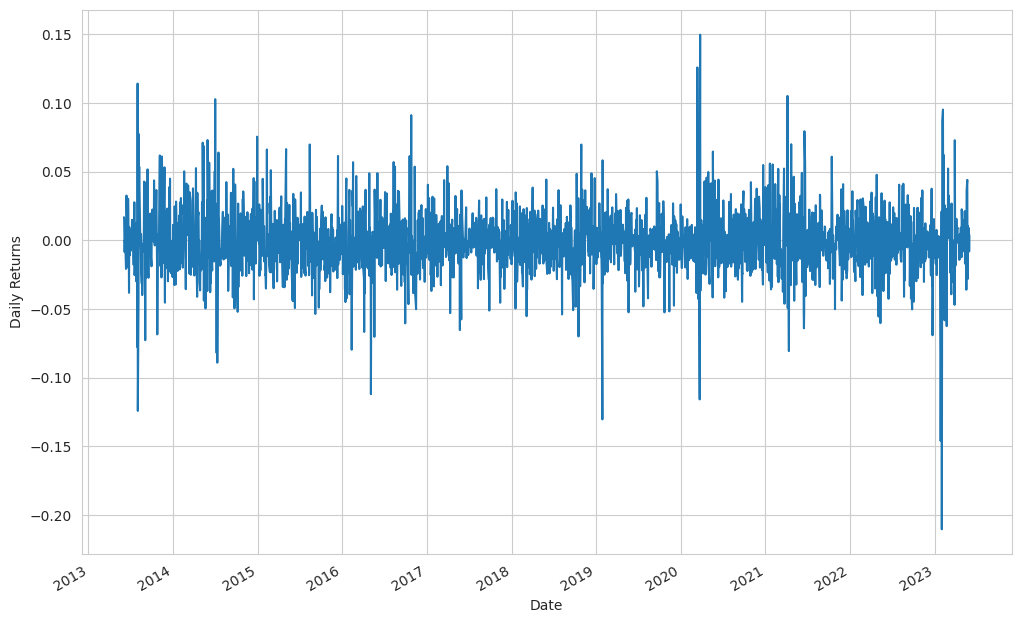

In [5]:
# Write your code here

rq['returns'].plot(figsize=(12,8),ylabel='Daily Returns')

What kind of distribution is observed?

Now, report the mean and standard deviation of the returns. As discussed earlier, this standard deviation is used as a risk metric.

In [6]:
# Write your code here
sum=0
std=0
count=0
for i in rq['returns']:
  sum+=i
  std+=i*i
  count+=1
mean=sum/count
print("Mean of daily returns is :",end=" ")
print(mean)
std/=count
std=m.sqrt(std)
print("Standard deviation of daily returns is :",end=" ")
print(std)


Mean of daily returns is : -0.0011109098834884566
Standard deviation of daily returns is : 0.022873312850476064


## **Skewness and Kurtosis**

Skewness and Kurtosis are two important metrics which are used to analyse any distribution.

Read the following blog : https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/

**Task 4**: Report the skewness and kurtosis of the returns which you have computed so far.

(Hint : you can use Numpy functions)

What information does this tell you?

In [7]:
# Write your code here
skewness=0;
kurtosis=0;
for i in rq['returns']:
  skewness+=((i-mean)**3)
  kurtosis+=((i-mean)**4)
skewness/=count
kurtosis/=count
po=std**3
skewness/=po
pp=std**4
kurtosis/=pp
print("Skewness of daily returns is :",end=" ")
print(skewness)
#since the value is between -0.5 and 0.5 , so it's nearly symmetrical
print("Kurtosis of daily returns is :",end=" ")
print(kurtosis)
#since the value is more than 3 , so it's Leptokurtic (Positive Kurtosis)


Skewness of daily returns is : -0.14412446190972025
Kurtosis of daily returns is : 9.927575875323285


# **Value at Risk (VaR)**

Value at risk (VaR) is a statistic that quantifies the extent of possible financial losses within a firm, portfolio, or position over a specific time frame. This metric is most commonly used by investment and commercial banks to determine the extent and probabilities of potential losses in their institutional portfolios.

In simple terms, VaR tells us the minimum possible loss we may incur on an investment for a given confidence interval.

**How to interpret VaR** : For eg. a value-at-risk of 10% in a 95% confidence interval means that there is a 5% chance that we may lose 10% or more of the capital in a given investment

Watch the following video : https://youtu.be/2SMkbMDypXI?si=bUCTuxqkxOELyhp6

**Task 5**: Using the historical returns of your stock on a 100-day lookback window, calculate the VaR for the 90%, 95% and 99% confidence intervals.

(Make use of the historical method of calculating VaR)

Assume that you have an invested capital of **Rs.1,00,000**

In [8]:
# Write your code here
days=100
rangeret=rq['returns'].rolling(window=days).sum()
rangeret=rangeret.dropna()
#print(rangeret)
portfolio=100000
c1=0.90
c2=0.95
c3=0.99
Var1=-np.percentile(rangeret,100-(c1*100))*portfolio
Var2=-np.percentile(rangeret,100-(c2*100))*portfolio
Var3=-np.percentile(rangeret,100-(c3*100))*portfolio
print("Value at risk for confidence level 0.90 will be : ",end="")
print(Var1)
print("Value at risk for confidence level 0.95 will be : ",end="")
print(Var2)
print("Value at risk for confidence level 0.99 will be : ",end="")
print(Var3)

Value at risk for confidence level 0.90 will be : 33787.6332230741
Value at risk for confidence level 0.95 will be : 45832.09162715244
Value at risk for confidence level 0.99 will be : 59845.59288843104


You can watch the following video for an in-depth tutorial: https://youtu.be/jZJsPi4j7wQ?si=hwSZrNMmTTXXTBfm